# EMA Visualization Script VENSIM Model

Date: 29-01-2019

Mark Havelaar;
Wouter Jaspers;
G.A. van Nederveen;
Willem L. Auping;
A.R.M. Wolfert

Title: Multivariate simulation model for adaptive long-term infrastructure planning 

Supplementary material for paper figures

### 1 Loading EMA Workbench & Other Relevant Packages

In [1]:
from __future__ import division
import sys

sys.path.append('D:\workspace\EMAProjects\WILLEM')
sys.path.append('D:\workspace\EMAProjects\WILLEM\Tools')

del sys

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats.kde as kde

from matplotlib.ticker import FormatStrFormatter, FuncFormatter
import matplotlib.font_manager as fm

from ema_workbench import util

from Figures import envelopes, lines, plot_lines_with_envelopes, string_to_upper_case, change_fig_appearance

__all__ = ['lines', 'envelopes', 'kde_over_time', 'multiple_densities']

TIME_LABEL = 'Time'

save = True
fig_size = (7,7)
dpi = 600
%matplotlib inline

C:\GitHub\EMAworkbench\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### 2 Specifying WD + Loading Results from Calculation File

In [2]:
#Working Directory for Loading Results
wd= r'D:\workspace\EMAProjects\WILLEM\Afstudeerders\IAM-ESDMA-master'

#Working Directory for Saving Figures
wd1= r'D:\workspace\EMAProjects\WILLEM\Afstudeerders\IAM-ESDMA-master\Figures'

In [3]:
file_name = wd + '\\IAM_road_2policies_1000runs.tar.gz'

results = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from D:\workspace\EMAProjects\WILLEM\Afstudeerders\IAM-ESDMA-master\IAM_road_2policies_1000runs.tar.gz


### 3 Getting an overview of the KPIs in the Results File

In [4]:
experiments, outcomes = results

starttime = 2017
keys = outcomes.keys()

all_KPIs = []

for key in sorted(keys):
    print(key)
    all_KPIs.append(key)

Lock System IC Factor
Road System IC Factor
TIME


Now we will group the generated results by policy. This will allow to generate graphs with only the results of one policy shown at the same time

In [5]:
grouped_by_policy = {}

for policy in np.unique(experiments['policy']):
    logical = experiments['policy']==policy
    outc_pol = {k:v[logical] for k,v in outcomes.items()}
    grouped_by_policy[policy] = experiments[logical], outc_pol

### 4 Specifying Ylabels for Graphs

In [6]:
ylabels = {}
ylabels['Lock System IC Factor'] = 'Lock System IC Factor (%)'
ylabels['Road System IC Factor'] = 'Road System IC Factor (%)'

### 5 Specifying Categories Labels per Scenario

In [7]:
#Switch Urbanization
Categories_labels_urb = ['Low Urbanization', 'Medium Urbanization', 'High Urbanization']
#Switch Economy
Categories_labels_eco = ['Low Economic Growth', 'Medium Economic Growth',  'High Economic Growth']
#Switch Climate Scenario
Categories_labels_climate = ['GL Scenario', 'GH Scenario', 'WL Scenario', 'WH Scenario']
#Switch Innovation
Categories_labels_inno = ['Low Innovation', 'Medium Innovation', 'High Innovation']
#Switch Connected and Unconnected
Categories_labels_con = ['Unconnected', 'Connected']

# Figures
In the underlying code, figures 3 to 8 as used in the paper are rendered.

## Figure 3

Low Economic Growth
Medium Economic Growth
High Economic Growth


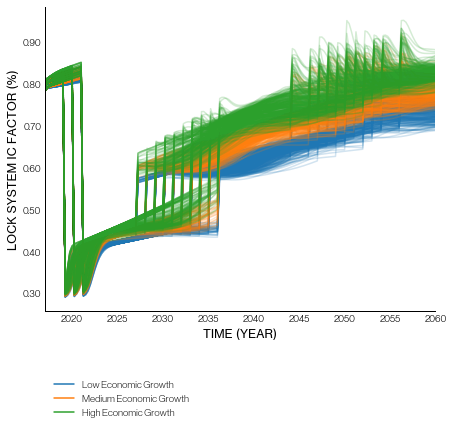

In [8]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
group_by_variable = 'Switch Economy'
policy="{'Switch Intervention Policy Road': 0}"
fig, axes = lines(grouped_by_policy[policy], 
                  outcomes_to_show=outcome, 
                  group_by=group_by_variable,
                  density='',
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_eco,
                  )
ax = axes[outcome]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_3_{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)

## Figure 4

Low Innovation
Medium Innovation
High Innovation


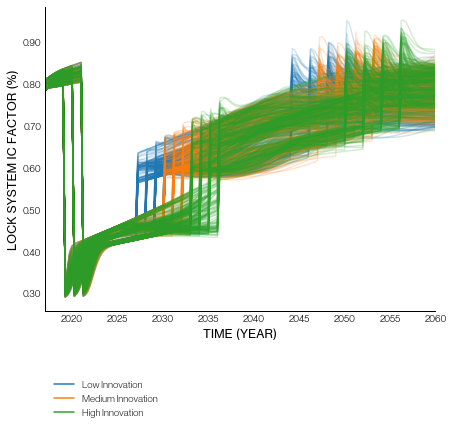

In [9]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
group_by_variable = 'Switch Innovation'
policy="{'Switch Intervention Policy Road': 0}"
fig, axes = lines(grouped_by_policy[policy], 
                  outcomes_to_show=outcome, 
                  group_by=group_by_variable,
                  density='',
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_inno,
                  )
ax = axes[outcome]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_4_{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)

## Figure 5

Low Urbanization
Medium Urbanization
High Urbanization


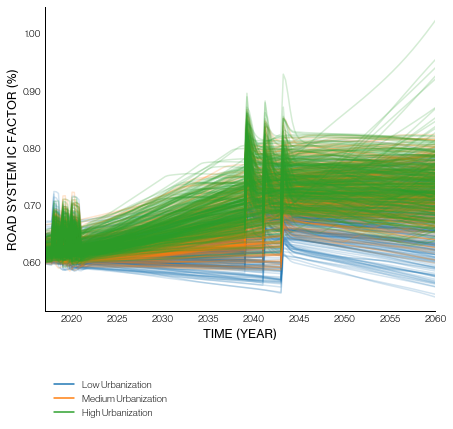

In [10]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
group_by_variable = 'Switch Urbanization'
policy="{'Switch Intervention Policy Road': 1}"
fig, axes = lines(grouped_by_policy[policy], 
                  outcomes_to_show=outcome, 
                  group_by=group_by_variable,
                  density='',                  # 'kde'
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_urb,
                  )
ax = axes[outcome]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_5__{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)

## Figure 6

GL Scenario
GH Scenario
WL Scenario
WH Scenario


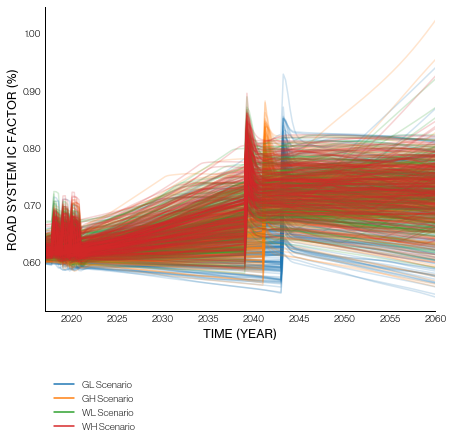

In [11]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
group_by_variable = 'Switch Climate Scenario'
policy="{'Switch Intervention Policy Road': 1}"
fig, axes = lines(grouped_by_policy[policy], 
                  outcomes_to_show=outcome, 
                  group_by=group_by_variable,
                  density='',                  # 'kde'
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_climate,
                  )
ax = axes[outcome]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_6_{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)

## Figure 7

Unconnected
Connected
Road System IC Factor


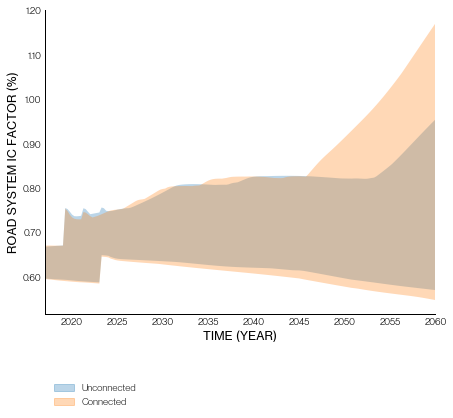

In [12]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True
outcome = 'Road System IC Factor'
group_by_variable = 'Switch Connected and Unconnected'
policy="{'Switch Intervention Policy Road': 0}"
fig, axes = envelopes(grouped_by_policy[policy],  
                      outcomes_to_show=outcome, 
                      group_by='Switch Building Mode',
                      density='', 
                      legend=legend, 
                      figsize=fig_size,
                      categories_labels=Categories_labels_con,
                      fill=True)
ax = axes[outcome]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title('')
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_7_{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)

## Figure 8

Unconnected
Connected
Lock System IC Factor


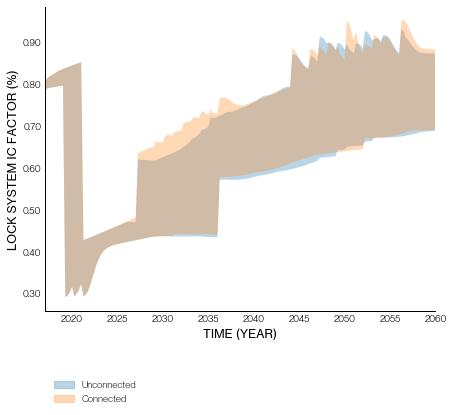

In [13]:
sns.set_style("whitegrid", {"axes.edgecolor": 'black', "grid.color": 'lightgrey'})

legend = True
outcome = 'Lock System IC Factor'
group_by_variable = 'Switch Connected and Unconnected'
policy="{'Switch Intervention Policy Road': 0}"
fig, axes = envelopes(grouped_by_policy[policy], 
                      outcomes_to_show=outcome, 
                      group_by='Switch Building Mode',
                      density='', 
                      legend=legend, 
                      figsize=fig_size,
                      categories_labels=Categories_labels_con,
                      fill=True)
ax = axes[outcome]

change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=None, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title('')
ax.set_xlim(xmin=2017, xmax=2060)
ax.grid(False)

if save:
    plt.savefig( wd1 + '\\Figure_8_{}_{}.png'. format(outcome, group_by_variable), dpi=dpi)